In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Tasks: 

Plot daily sales for all 50 weeks.

It looks like there has been a sudden change in daily sales. What date did it occur?

Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?

Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).

Assume a given day is divided into four dayparts:

night (12:00AM - 6:00AM),
morning (6:00AM - 12:00PM),
afternoon (12:00PM - 6:00PM),
evening (6:00PM - 12:00AM).
What is the percentage of sales in each daypart over all 50 weeks?

In [2]:
# Getting all the csv file paths

csv_files = glob.glob('D:/Stratascarth Data Proejcts/datasets 2/datasets/*.csv')

In [3]:
# Read and combine all csv files

df_list = [pd.read_csv(file) for file in csv_files]

In [4]:
# Concatenate into one dataframe

combined_df = pd.concat(df_list,ignore_index = True)

In [5]:
# Step 4: Save combined data to a new CSV

combined_df.to_csv('combined_sales_data.csv', index=False)

In [6]:
sales_data = pd.read_csv('combined_sales_data.csv')
sales_data.head()

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [8]:
sales_data.duplicated().sum()

508

In [9]:
sales_data['sale_time'] = pd.to_datetime(sales_data['sale_time'])

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_time         204329 non-null  datetime64[ns]
 1   purchaser_gender  204329 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.1+ MB


In [11]:
sales_data.duplicated().sum()

508

In [12]:
sales_data.head()

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [13]:
duplicates = sales_data[sales_data.duplicated()]
duplicates

,sale_time,purchaser_gender
460,2012-10-01 20:11:42,female
908,2012-10-02 18:25:10,female
1054,2012-10-03 06:47:49,female
1200,2012-10-03 11:43:29,female
1278,2012-10-03 14:09:57,female
...,...,...
201573,2013-09-12 08:15:41,male
202755,2013-09-13 17:59:27,male
202899,2013-09-13 22:17:21,male
203882,2013-09-15 12:23:29,male


* We will keep the duplciate value as the nature of the data does not allow us to delete them.

In [14]:
sales_data.head(3)

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female


In [15]:
sales_data['day'] = sales_data['sale_time'].dt.day

In [16]:
sales_data.tail(3)

,sale_time,purchaser_gender,day
204326,2013-09-15 23:43:24,male,15
204327,2013-09-15 23:43:32,male,15
204328,2013-09-15 23:48:47,male,15


## Task 1: Plot daily sales for all 50 weeks.

In [17]:
daily_sales = sales_data.copy()

In [18]:
daily_sales.head(3)

,sale_time,purchaser_gender,day
0,2012-10-01 01:42:22,female,1
1,2012-10-01 02:24:53,female,1
2,2012-10-01 02:25:40,female,1


In [19]:
daily_sales['sale_time'] = daily_sales['sale_time'].dt.date

In [20]:
sales = daily_sales.groupby(['sale_time']).size().reset_index(name='sales_count')

In [21]:
sales

,sale_time,sales_count
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476
...,...,...
345,2013-09-11,719
346,2013-09-12,735
347,2013-09-13,743
348,2013-09-14,655


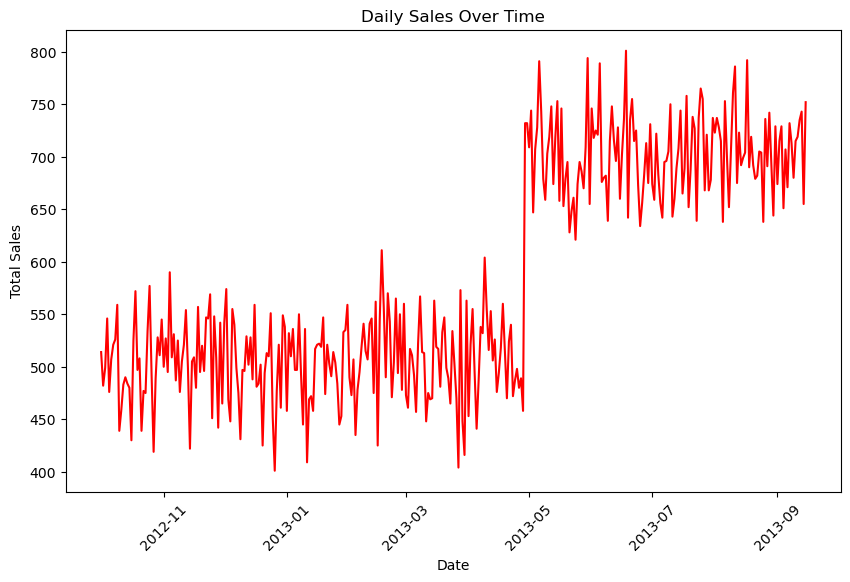

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(sales['sale_time'],sales['sales_count'], color='red')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Task No2: It looks like there has been a sudden change in daily sales. What date did it occur?

* From the above graph we can see that sudden increment in the sales occured during May 2013

In [23]:
sales['sale_time'] = pd.to_datetime(sales['sale_time'])

filtered_sales = sales[
    (sales['sale_time'] > '2013-04-01') &
    (sales['sale_time'] < '2013-05-30')
]

filtered_sales

,sale_time,sales_count
183,2013-04-02,521
184,2013-04-03,555
185,2013-04-04,495
186,2013-04-05,441
187,2013-04-06,487
188,2013-04-07,538
189,2013-04-08,532
190,2013-04-09,604
191,2013-04-10,555
192,2013-04-11,516


* On 29th april 2013 the sales were suddenly increased

### Task No 3: Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value

<Axes: >

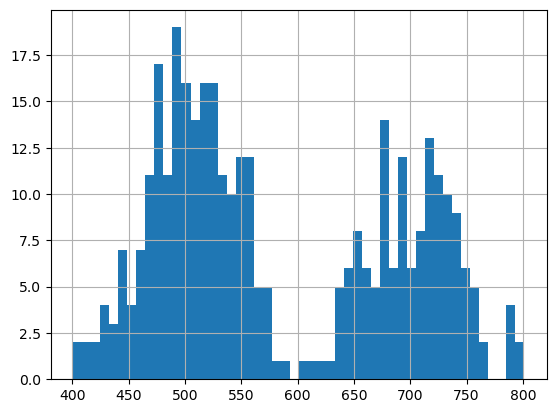

In [24]:
sales['sales_count'].hist(bins=50)

* We will use two sample t-test to compare the sales before and after the increment

In [25]:
before_inc = sales[sales['sale_time'] < '2013-04-29']['sales_count']
after_inc = sales[sales['sale_time'] >= '2013-04-29']['sales_count']

In [26]:
after_inc.head()

210    732
211    732
212    709
213    744
214    647
Name: sales_count, dtype: int64

In [27]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(before_inc, after_inc)

print(p_value)

2.27287631770394e-149


In [28]:
if p_value < 0.05:
    print("The change in daily sales is statistically significant.")
else:
    print("No statistically significant change in daily sales at the selected date.")

The change in daily sales is statistically significant.


### Task No 4: Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer

In [29]:
daily_sales.head()

,sale_time,purchaser_gender,day
0,2012-10-01,female,1
1,2012-10-01,female,1
2,2012-10-01,female,1
3,2012-10-01,female,1
4,2012-10-01,male,1


In [30]:
gender_sales = daily_sales.groupby(['sale_time','purchaser_gender']).size().reset_index(name='total_sales')
gender_sales

,sale_time,purchaser_gender,total_sales
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


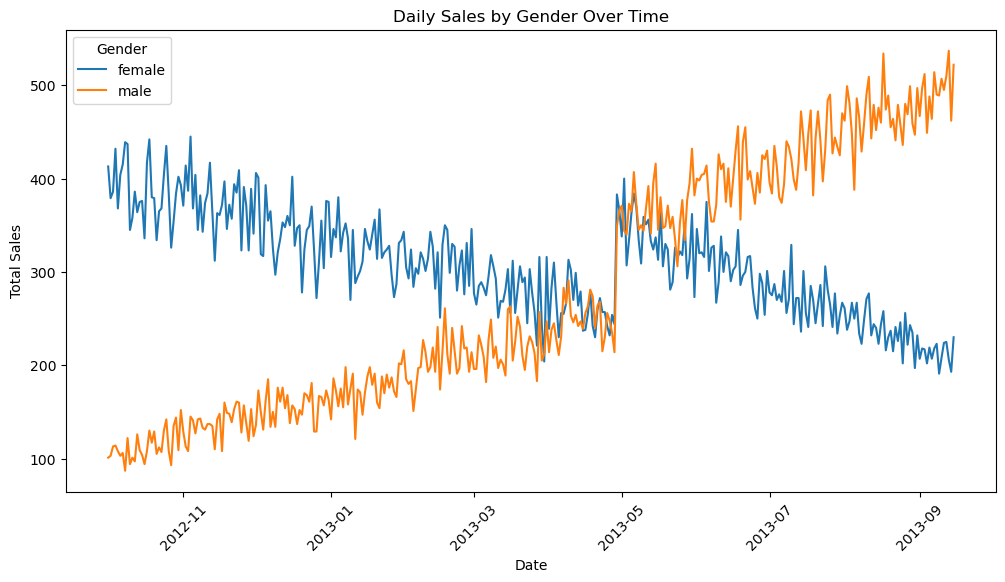

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_sales, x='sale_time', y='total_sales', hue='purchaser_gender')
plt.title('Daily Sales by Gender Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

* From the above graph we can see that the sudden increase in the sales is becuase of the increase in purchases made by both male and females.

### Task No 5: 

Assume a given day is divided into four dayparts:

night (12:00AM - 6:00AM),
morning (6:00AM - 12:00PM),
afternoon (12:00PM - 6:00PM),
evening (6:00PM - 12:00AM).


What is the percentage of sales in each daypart over all 50 weeks?

In [32]:
sales_data.head()

,sale_time,purchaser_gender,day
0,2012-10-01 01:42:22,female,1
1,2012-10-01 02:24:53,female,1
2,2012-10-01 02:25:40,female,1
3,2012-10-01 02:30:42,female,1
4,2012-10-01 02:51:32,male,1


In [33]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_time         204329 non-null  datetime64[ns]
 1   purchaser_gender  204329 non-null  object        
 2   day               204329 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 3.9+ MB


In [34]:
def get_time_period(hour):
    if hour >= 0 and hour < 6:
        return 'night'
    elif hour >= 6 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 18:
        return 'afternoon'
    elif hour >= 18 and hour < 24:
        return 'evening'

In [35]:
sales_data['time_period'] = sales_data['sale_time'].dt.hour.apply(get_time_period)


In [36]:
sales_data.head()

,sale_time,purchaser_gender,day,time_period
0,2012-10-01 01:42:22,female,1,night
1,2012-10-01 02:24:53,female,1,night
2,2012-10-01 02:25:40,female,1,night
3,2012-10-01 02:30:42,female,1,night
4,2012-10-01 02:51:32,male,1,night


In [37]:
sales_by_period = sales_data.groupby('time_period').size().reset_index(name='total_sales')
sales_by_period

,time_period,total_sales
0,afternoon,80533
1,evening,42620
2,morning,62870
3,night,18306


In [38]:
sales_by_period['percentages'] = sales_by_period['total_sales'] / sales_by_period['total_sales'].sum() * 100

In [40]:
sales_by_period.head()

,time_period,total_sales,percentages
0,afternoon,80533,39.413397
1,evening,42620,20.858517
2,morning,62870,30.769005
3,night,18306,8.959081
